# Predict Career Longevity for NBA Rookies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Train_data.csv")
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [4]:
df.shape

(1101, 20)

In [5]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.008156,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.236886,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.223257,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.387147,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


In [6]:
df.dtypes

GP         float64
MIN        float64
PTS        float64
FGM        float64
FGA        float64
FG%        float64
3P Made    float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object

In [7]:
df.isna().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [8]:
X = df.drop(["Target"], axis =1)
y = df["Target"]

In [9]:
X.head()
X.shape

(1101, 19)

In [10]:
y.shape

(1101,)

<AxesSubplot:xlabel='variable', ylabel='value'>

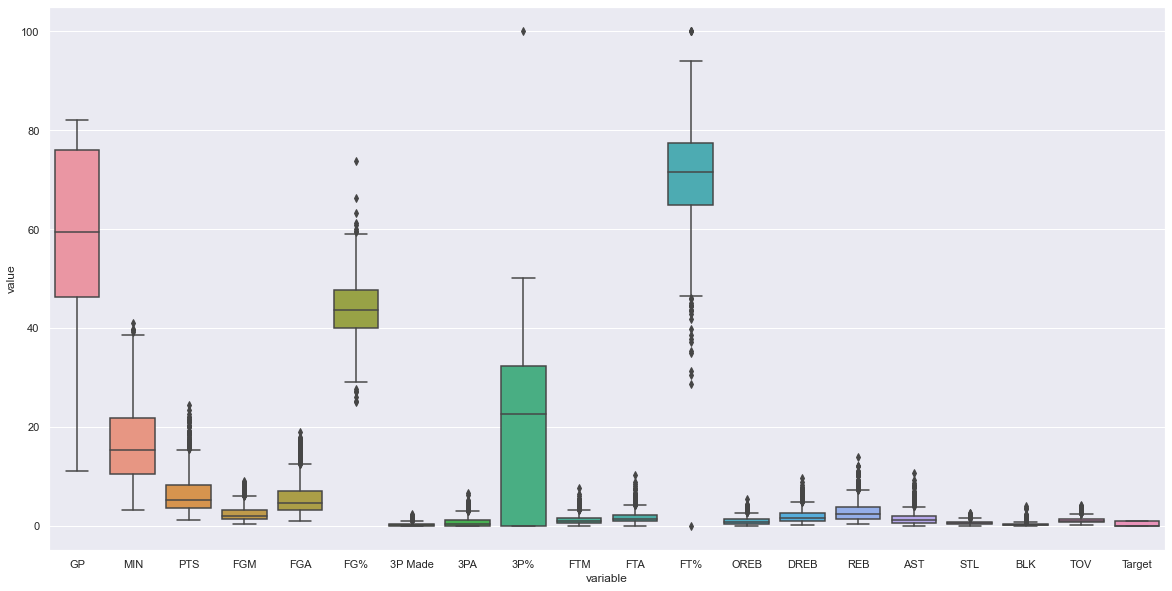

In [11]:
sns.set(rc = {'figure.figsize':(20,10)})

sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y
X_scaled

array([[-4.73388705e-04, -5.14071774e-01, -7.45403710e-01, ...,
        -7.49803272e-01,  1.33276364e-01, -9.46325925e-01],
       [-1.62563489e+00, -7.75572865e-01, -7.45403710e-01, ...,
        -7.49803272e-01, -5.83313512e-01, -1.38275681e+00],
       [-6.38929695e-01, -9.49906925e-01, -4.81105452e-01, ...,
        -2.31630277e-01,  1.33276364e-01, -2.18941113e-01],
       ...,
       [ 3.47775505e-01, -4.64262043e-01, -3.60969880e-01, ...,
         2.86542717e-01, -1.05586928e-01, -5.09895038e-01],
       [-2.32639318e-01, -2.52570684e-01, -5.77213909e-01, ...,
         2.86542717e-01, -3.44450220e-01, -5.09895038e-01],
       [-2.32639318e-01,  1.04248234e+00,  1.80147041e+00, ...,
         1.84106170e+00,  1.33276364e-01,  3.62966736e-01]])

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [18]:
def score(model, title = "Default"):
    model.fit(X_scaled, y_scaled)
    preds = model.predict(X_scaled)
#     pred = np.ravel(preds)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_scaled, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [20]:
gnb = GaussianNB()
score(gnb, "gaussianNB")

Accuracy for gaussianNB : 0.67302 



In [22]:
xgbc = XGBClassifier()
score(xgbc)
# max score

Accuracy for Default : 0.99001 



In [23]:
xgbrf = XGBRFClassifier()
score(xgbrf)

Accuracy for Default : 0.85468 



In [24]:
from sklearn.svm import SVC 
svc = SVC()
score(svc)

Accuracy for Default : 0.72116 



In [25]:
df2 = pd.read_csv("Test_data.csv")
df2.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [26]:
df2.isna().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

In [28]:
X_test_scaled = scaler.transform(df2)
X_test_scaled

array([[-0.87109562, -0.48916691,  0.02346395, ...,  0.28654272,
        -0.34445022, -0.21894111],
       [-0.46480525, -0.97481179, -0.91359351, ...,  0.02745622,
        -0.58331351, -0.655372  ],
       [-0.46480525, -0.22766582, -0.19278008, ...,  0.28654272,
        -0.8221768 ,  0.36296674],
       ...,
       [-0.75501266,  0.69381422,  0.88844007, ...,  0.28654272,
         1.56645612,  0.07201281],
       [-0.34872228, -1.32347991, -0.98567485, ..., -0.74980327,
        -0.8221768 , -1.09180289],
       [ 1.33448071,  0.60664719,  0.67219604, ..., -0.49071677,
         0.61100295,  0.21748977]])

In [29]:
y_pred = xgbc.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [30]:
res = pd.DataFrame(y_pred)

res.index = df2.index
res.columns = ["prediction"]
res.to_csv("predicted_results.csv", index=False)